# coffee shop analysis

An analysis on coffee shop ratings to determine the bet place to find good coffee. 

### import city data

To start we find find US cities to search for coffee shops. Below we loaded a dataset of US cities from https://simplemaps.com/data/us-cities and sorted it by population. 

In [1]:
# import dataset
from csv import reader
opened_file = open('uscities.csv')
read_file = reader(opened_file)
uscities = list(read_file)
### dataset provided by https://simplemaps.com/data/us-cities

In [2]:
# view data 
uscities 

[['city',
  'city_ascii',
  'state_id',
  'state_name',
  'county_fips',
  'county_name',
  'lat',
  'lng',
  'population',
  'density',
  'source',
  'military',
  'incorporated',
  'timezone',
  'ranking',
  'zips',
  'id'],
 ['New York',
  'New York',
  'NY',
  'New York',
  '36061',
  'New York',
  '40.6943',
  '-73.9249',
  '18713220',
  '10715',
  'polygon',
  'FALSE',
  'TRUE',
  'America/New_York',
  '1',
  '11229 11226 11225 11224 11222 11221 11220 11385 10169 10168 10167 10165 10162 10282 10280 10040 10044 11109 11104 11105 11379 11378 11377 11697 11694 11692 11693 11691 10271 10279 10278 10075 10302 10301 10452 11451 10475 10474 10471 10470 10473 10472 11228 11223 10103 11368 11369 11366 11367 11364 11365 11362 11363 11360 11361 10028 10029 10026 10027 10024 10025 10022 10023 10020 10021 11212 11213 11210 11211 11216 11217 11214 11215 11218 11219 10152 10153 10154 10307 10306 10305 11429 10310 10311 10312 10314 11432 11433 11430 11436 11434 11435 10453 10451 10457 10456 1045

In [3]:
# convert data to data frame
import pandas as pd
uscities = pd.DataFrame(uscities[1:], columns = ['city',
  'city_ascii',
  'state_id',
  'state_name',
  'county_fips',
  'county_name',
  'lat',
  'lng',
  'population',
  'density',
  'source',
  'military',
  'incorporated',
  'timezone',
  'ranking',
  'zips',
  'id',])

In [4]:
###clean city data
uscities = uscities.drop(["city_ascii", "county_fips", "county_name", "source", "military", "incorporated", "timezone", "ranking", "zips", "id"], axis = 1)

In [5]:
uscities.head(5)

city state_id  state_name      lat        lng population density
0     New York       NY    New York  40.6943   -73.9249   18713220   10715
1  Los Angeles       CA  California  34.1139  -118.4068   12750807    3276
2      Chicago       IL    Illinois  41.8373   -87.6862    8604203    4574
3        Miami       FL     Florida  25.7839   -80.2102    6445545    5019
4       Dallas       TX       Texas  32.7936   -96.7662    5743938    1526

In [6]:
### add latitide & Longitude column
uscities["ll"] =  uscities['lat'].str.cat(uscities['lng'],sep=", ")

In [7]:
### reformat data
uscities = pd.DataFrame(uscities, columns = ['city',
  'state_id',
  'state_name',
  'lat',
  'lng',
  'll',                                              
  'population',
  'density',
   ])

In [8]:
uscities.shape

(28372, 8)

In [9]:
# convert datatypes in uscities
uscities['lat'] = uscities['lat'].astype(float)
uscities['lng'] = uscities['lng'].astype(float)
uscities['ll'] = uscities['ll'].astype(str)
uscities['population'] = uscities['population'].astype(float)
uscities['density'] = uscities['density'].astype(float)
print(uscities.dtypes)

city           object
state_id       object
state_name     object
lat           float64
lng           float64
ll             object
population    float64
density       float64
dtype: object


In [28]:
# view final city dataset
uscities

city state_id    state_name      lat       lng  \
0         New York       NY      New York  40.6943  -73.9249   
1      Los Angeles       CA    California  34.1139 -118.4068   
2          Chicago       IL      Illinois  41.8373  -87.6862   
3            Miami       FL       Florida  25.7839  -80.2102   
4           Dallas       TX         Texas  32.7936  -96.7662   
...            ...      ...           ...      ...       ...   
28367    Poso Park       CA    California  35.8114 -118.6364   
28368       Lotsee       OK      Oklahoma  36.1334  -96.2091   
28369    The Ranch       MN     Minnesota  47.3198  -95.6952   
28370      Roswell       SD  South Dakota  44.0060  -97.6975   
28371       Monowi       NE      Nebraska  42.8307  -98.3296   

                       ll  population  density  
0       40.6943, -73.9249  18713220.0  10715.0  
1      34.1139, -118.4068  12750807.0   3276.0  
2       41.8373, -87.6862   8604203.0   4574.0  
3       25.7839, -80.2102   6445545.0   5019.0  
4       32.7936, -96.7662   5743938.0   1526.0  
...                   ...         ...      ...  
28367  35.8114, -118.6364         2.0     17.0  
28368   36.1334, -96.2091         2.0     39.0  
28369   47.3198, -95.6952         2.0      2.0  
28370   44.0060, -97.6975         2.0      1.0  
28371   42.8307, -98.3296         1.0      1.0  

[28372 rows x 8 columns]

Once we have an established set of US Cities we loop throught these cities to find coffee shops and build a coffee shop dataset

In [29]:
# load programs
import json, requests 
from pandas import json_normalize


In [12]:
# create function to generate coffee shops
def coffee_find(lat_lng):
    url = 'https://api.foursquare.com/v2/venues/explore'
    params = dict(
        client_id='3Q530RJEKQDDEZHANP4BXSEK5BA2JJ1WFTA4L1IR0YNT1I1Q',
        client_secret='TRBK4GRSWRTDLW35X3IN2S2AFO5HHNJCDNARRFEZRLICGRKQ',
        v='20210115',
        ll= lat_lng,
        radius = '1700',
        query= 'coffee',
        limit= '1500')
        
    results = requests.get(url=url, params=params).json()

    venues = results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues)
    nearby_venues  = pd.DataFrame(nearby_venues, columns = ['venue.id',
        'venue.name','venue.location.address', 'venue.location.lat', 'venue.location.lng'])
    return nearby_venues


In [30]:
### find coffee shops for 10 most populated cities

coffee_list = coffee_find(uscities.loc[0]['ll'])
coffee_list = coffee_list.append(coffee_find(uscities.loc[1]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[2]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[3]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[4]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[5]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[6]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[7]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[8]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[9]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[10]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[11]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[12]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[13]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[14]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[15]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[16]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[17]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[18]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[19]['ll']))
coffee_list = coffee_list.append(coffee_find(uscities.loc[20]['ll']))

coffee_list = coffee_list.reset_index()
coffee_list = coffee_list.rename(columns={"venue.id": 
                                          "id", "venue.name": "coffee_shop", 
                                          "venue.location.address":"coffee_shop_address", 
                                          "venue.location.lat":"cs_lat", 
                                          "venue.location.lng":"cs_lng"})
coffee_list = coffee_list.drop(columns="index")

In [40]:
coffee_list = coffee_list[0:500]
coffee_list

id                  coffee_shop  \
0    53dc5f20498ec5526249f15f               Sunrise/Sunset   
1    5818974a38fa5b066b4ee6ff                Hearts Coffee   
2    55e9fe71498e8edb034385a7                       Dweebs   
3    594a997fd48ec17dba25d273          Knickerbocker Bagel   
4    57b0cc38498e0f1b80d4e377              Cup of Brooklyn   
..                        ...                          ...   
495  4b4b861af964a5201f9f26e3  Ameriprise Financial Center   
496  44315384f964a520ee311fe3                     Caffetto   
497  5ae0b16d2faed54a00e93ed8               Caribou Coffee   
498  5baa3648f1936e002cf3bb30               Caribou Coffee   
499  4ab7ae8cf964a520717a20e3                 Cafe Patteen   

       coffee_shop_address     cs_lat     cs_lng  
0        351 Evergreen Ave  40.693544 -73.922875  
1            1207 Broadway  40.692155 -73.926602  
2          1434 Dekalb Ave  40.700507 -73.922795  
3    367 Knickerbocker Ave  40.700551 -73.921392  
4          1071B Gates Ave  40.689544 -73.922596  
..                     ...        ...        ...  
495          707 2nd Ave S  44.975220 -93.269068  
496          708 W 22nd St  44.960993 -93.288538  
497      800 Nicollet Mall  44.975942 -93.273698  
498      1201 Hennepin Ave  44.974300 -93.280692  
499          920 2nd Ave S  44.973268 -93.272083  

[500 rows x 5 columns]

In [51]:
def coffee_details(venue_id):
    CLIENT_ID='3Q530RJEKQDDEZHANP4BXSEK5BA2JJ1WFTA4L1IR0YNT1I1Q'
    CLIENT_SECRET='TRBK4GRSWRTDLW35X3IN2S2AFO5HHNJCDNARRFEZRLICGRKQ'
    ACCESS_TOKEN = ''
    v='20210115'
    venue_id = venue_id 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, v)
    cafe_result = requests.get(url).json()
    cafe_result['response']
    coffee_venues = cafe_result
    return coffee_venues

In [59]:
####convert data frame to list of lists
coffee_list_py = coffee_list.values.tolist()
coffee_list_py[0:1]

[['53dc5f20498ec5526249f15f',
  'Sunrise/Sunset',
  '351 Evergreen Ave',
  40.69354358629492,
  -73.92287527081452]]

In [65]:
coffee_venues = []
for row in coffee_list_py[0:499]:
    c_id = row[0]
    coffee_shop = coffee_details(c_id)
    coffee_venues.append(coffee_shop)

In [66]:
coffee_venues

[{'meta': {'code': 200, 'requestId': '6028af07b2301614a42e8027'},
  'response': {'venue': {'id': '53dc5f20498ec5526249f15f',
    'name': 'Sunrise/Sunset',
    'contact': {'phone': '3474425880',
     'formattedPhone': '(347) 442-5880',
     'twitter': 'sunrisesunsetbk',
     'facebook': '1454426901492133',
     'facebookUsername': 'sunrisesunsetbk',
     'facebookName': 'Sunrise/Sunset'},
    'location': {'address': '351 Evergreen Ave',
     'crossStreet': 'Bleecker St.',
     'lat': 40.69354358629492,
     'lng': -73.92287527081452,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.69354358629492,
       'lng': -73.92287527081452},
      {'label': 'entrance', 'lat': 40.693705, 'lng': -73.922805}],
     'postalCode': '11221',
     'cc': 'US',
     'city': 'Brooklyn',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['351 Evergreen Ave (Bleecker St.)',
      'Brooklyn, NY 11221',
      'United States']},
    'canonicalUrl': 'https://foursquare.com

In [67]:
coffee_venues_test = coffee_venues
coffee_venues_test = json_normalize(coffee_venues_test)

In [68]:
coffee_venues_test

meta.code            meta.requestId         response.venue.id  \
0          200  6028af07b2301614a42e8027  53dc5f20498ec5526249f15f   
1          200  6028af089671424fd3c99a37  5818974a38fa5b066b4ee6ff   
2          200  6028af085c6a614aab78764e  55e9fe71498e8edb034385a7   
3          200  6028af08358abb29728cbba8  594a997fd48ec17dba25d273   
4          200  6028af09f3484c1e420a3cb4  57b0cc38498e0f1b80d4e377   
..         ...                       ...                       ...   
494        429  6028af9522b38d24d019719b                       NaN   
495        429  6028af96b9e8291154ebf903                       NaN   
496        429  6028af96d7e05c247959785a                       NaN   
497        429  6028af973916cb7a77a319f3                       NaN   
498        429  6028af97443e2c5300319ccb                       NaN   

     response.venue.name response.venue.contact.phone  \
0         Sunrise/Sunset                   3474425880   
1          Hearts Coffee                   9292762770   
2                 Dweebs                          NaN   
3    Knickerbocker Bagel                   7187098888   
4        Cup of Brooklyn                          NaN   
..                   ...                          ...   
494                  NaN                          NaN   
495                  NaN                          NaN   
496                  NaN                          NaN   
497                  NaN                          NaN   
498                  NaN                          NaN   

    response.venue.contact.formattedPhone response.venue.contact.twitter  \
0                          (347) 442-5880                sunrisesunsetbk   
1                          (929) 276-2770                            NaN   
2                                     NaN                            NaN   
3                          (718) 709-8888                            NaN   
4                                     NaN                            NaN   
..                                    ...                            ...   
494                                   NaN                            NaN   
495                                   NaN                            NaN   
496                                   NaN                            NaN   
497                                   NaN                            NaN   
498                                   NaN                            NaN   

    response.venue.contact.facebook response.venue.contact.facebookUsername  \
0                  1454426901492133                         sunrisesunsetbk   
1                               NaN                                     NaN   
2                               NaN                                     NaN   
3                               NaN                                     NaN   
4                               NaN                                     NaN   
..                              ...                                     ...   
494                             NaN                                     NaN   
495                             NaN                                     NaN   
496                             NaN                                     NaN   
497                             NaN                                     NaN   
498                             NaN                                     NaN   

    response.venue.contact.facebookName  ...  \
0                        Sunrise/Sunset  ...   
1                                   NaN  ...   
2                                   NaN  ...   
3                                   NaN  ...   
4                                   NaN  ...   
..                                  ...  ...   
494                                 NaN  ...   
495                                 NaN  ...   
496                                 NaN  ...   
497                                 NaN  ...   
498                                 NaN  ...   

    response.venue.parent.location.neigh

In [69]:
coffee_venues_test = pd.DataFrame(coffee_venues_test, columns = ['response.venue.id','response.venue.name','response.venue.price.tier','response.venue.rating','response.venue.likes.count'])
coffee_venues_test = coffee_venues_test.rename(columns={'response.venue.id':'id', 'response.venue.name':'name', 'response.venue.price.tier':'price_tier', 'response.venue.rating':'rating', 'response.venue.likes.count':'likes_count'})


In [70]:
coffee_venues_test

id                 name  price_tier  rating  \
0    53dc5f20498ec5526249f15f       Sunrise/Sunset         3.0     8.5   
1    5818974a38fa5b066b4ee6ff        Hearts Coffee         1.0     8.7   
2    55e9fe71498e8edb034385a7               Dweebs         1.0     8.8   
3    594a997fd48ec17dba25d273  Knickerbocker Bagel         1.0     9.0   
4    57b0cc38498e0f1b80d4e377      Cup of Brooklyn         1.0     8.2   
..                        ...                  ...         ...     ...   
494                       NaN                  NaN         NaN     NaN   
495                       NaN                  NaN         NaN     NaN   
496                       NaN                  NaN         NaN     NaN   
497                       NaN                  NaN         NaN     NaN   
498                       NaN                  NaN         NaN     NaN   

     likes_count  
0          119.0  
1           39.0  
2           86.0  
3           63.0  
4           42.0  
..           ...  
494          NaN  
495          NaN  
496          NaN  
497          NaN  
498          NaN  

[499 rows x 5 columns]

In [71]:
coffee_shop_list = coffee_list.merge(coffee_venues_test, how= 'outer', on= 'id')
coffee_shop_list = coffee_shop_list.drop(columns='name')
coffee_shop_list

id          coffee_shop    coffee_shop_address  \
0    53dc5f20498ec5526249f15f       Sunrise/Sunset      351 Evergreen Ave   
1    5818974a38fa5b066b4ee6ff        Hearts Coffee          1207 Broadway   
2    55e9fe71498e8edb034385a7               Dweebs        1434 Dekalb Ave   
3    594a997fd48ec17dba25d273  Knickerbocker Bagel  367 Knickerbocker Ave   
4    57b0cc38498e0f1b80d4e377      Cup of Brooklyn        1071B Gates Ave   
..                        ...                  ...                    ...   
505                       NaN                  NaN                    NaN   
506                       NaN                  NaN                    NaN   
507                       NaN                  NaN                    NaN   
508                       NaN                  NaN                    NaN   
509                       NaN                  NaN                    NaN   

        cs_lat     cs_lng  price_tier  rating  likes_count  
0    40.693544 -73.922875         3.0     8.5        119.0  
1    40.692155 -73.926602         1.0     8.7         39.0  
2    40.700507 -73.922795         1.0     8.8         86.0  
3    40.700551 -73.921392         1.0     9.0         63.0  
4    40.689544 -73.922596         1.0     8.2         42.0  
..         ...        ...         ...     ...          ...  
505        NaN        NaN         NaN     NaN          NaN  
506        NaN        NaN         NaN     NaN          NaN  
507        NaN        NaN         NaN     NaN          NaN  
508        NaN        NaN         NaN     NaN          NaN  
509        NaN        NaN         NaN     NaN          NaN  

[510 rows x 8 columns]

In [72]:
u_rating = coffee_shop_list.rating.unique()
print(u_rating)
u_rating_counts = coffee_shop_list.rating.value_counts(dropna=False)
u_rating_counts

[8.5 8.7 8.8 9.  8.2 8.1 8.4 8.3 9.2 7.9 7.5 8.6 7.6 7.4 8.  9.1 7.7 7.8
 7.3 6.9 7.  6.8 7.2 7.1 6.5 6.7 6.6 6.4 6.3 6.  6.2 nan 5.9 5.7 6.1 5.3
 9.4 8.9 5.8 9.5 5.4 5.2]


NaN    101
7.5     23
7.7     23
7.9     23
7.8     19
7.3     17
8.5     16
7.0     16
6.8     16
8.6     16
7.6     16
8.1     14
6.9     13
7.1     12
8.3     12
6.7     12
8.0     11
7.4     11
8.4     11
7.2     11
6.3     10
6.5     10
8.7     10
9.0     10
9.2      9
8.9      8
8.8      8
8.2      8
6.0      6
6.6      6
6.1      6
5.9      6
6.2      4
9.1      4
9.4      3
5.7      2
6.4      2
5.8      1
5.2      1
5.4      1
9.5      1
5.3      1
Name: rating, dtype: int64

In [73]:
coffee_shop_list = coffee_shop_list.dropna()
coffee_shop_list = coffee_shop_list.reset_index(drop=True)
coffee_shop_list

id          coffee_shop    coffee_shop_address  \
0    53dc5f20498ec5526249f15f       Sunrise/Sunset      351 Evergreen Ave   
1    5818974a38fa5b066b4ee6ff        Hearts Coffee          1207 Broadway   
2    55e9fe71498e8edb034385a7               Dweebs        1434 Dekalb Ave   
3    594a997fd48ec17dba25d273  Knickerbocker Bagel  367 Knickerbocker Ave   
4    57b0cc38498e0f1b80d4e377      Cup of Brooklyn        1071B Gates Ave   
..                        ...                  ...                    ...   
379  561bbabd498e0094cb0e6a72        Misfit Coffee     2401 Lyndale Ave S   
380  5c8f9e3cf870fd002c853ce1       Caribou Coffee   50 S 10th St Ste 230   
381  4f901462e4b0d414c372ffe0            Starbucks     1000 Nicollet Mall   
382  5ac606f761e53b3252d39ed8            Starbucks          800 E 26th St   
383  438e8cedf964a520392b1fe3         Panera Bread      809 Nicollet Mall   

        cs_lat     cs_lng  price_tier  rating  likes_count  
0    40.693544 -73.922875         3.0     8.5        119.0  
1    40.692155 -73.926602         1.0     8.7         39.0  
2    40.700507 -73.922795         1.0     8.8         86.0  
3    40.700551 -73.921392         1.0     9.0         63.0  
4    40.689544 -73.922596         1.0     8.2         42.0  
..         ...        ...         ...     ...          ...  
379  44.958956 -93.287652         1.0     7.7          5.0  
380  44.972964 -93.275810         1.0     7.2          0.0  
381  44.973337 -93.275716         1.0     7.2          5.0  
382  44.954472 -93.260524         1.0     7.1          0.0  
383  44.975469 -93.273207         1.0     7.3         57.0  

[384 rows x 8 columns]

In [74]:
import random 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [75]:
Coffee_cluster_set = coffee_shop_list.drop('coffee_shop_address', axis=1)
Coffee_cluster_set = Coffee_cluster_set.drop('id', axis=1)
Coffee_cluster_set = Coffee_cluster_set.drop('coffee_shop', axis=1)
Coffee_cluster_set.head()

cs_lat     cs_lng  price_tier  rating  likes_count
0  40.693544 -73.922875         3.0     8.5        119.0
1  40.692155 -73.926602         1.0     8.7         39.0
2  40.700507 -73.922795         1.0     8.8         86.0
3  40.700551 -73.921392         1.0     9.0         63.0
4  40.689544 -73.922596         1.0     8.2         42.0

In [76]:
#Scale price_tier, rating, likes_count
from sklearn.preprocessing import StandardScaler
X = Coffee_cluster_set.values[:,2:]
X = np.nan_to_num(X)

flat_Coffee_cluster_set = StandardScaler().fit_transform(X)
flat_Coffee_cluster_set


array([[ 4.49589962,  1.02382841,  0.35034112],
       [-0.42970795,  1.25307046, -0.34173522],
       [-0.42970795,  1.36769149,  0.06485963],
       ...,
       [-0.42970795, -0.46624489, -0.63586766],
       [-0.42970795, -0.58086592, -0.67912243],
       [-0.42970795, -0.35162387, -0.18601804]])

In [77]:
X

array([[  3. ,   8.5, 119. ],
       [  1. ,   8.7,  39. ],
       [  1. ,   8.8,  86. ],
       ...,
       [  1. ,   7.2,   5. ],
       [  1. ,   7.1,   0. ],
       [  1. ,   7.3,  57. ]])

Text(0.5, 1.0, 'Likes & Ratings')

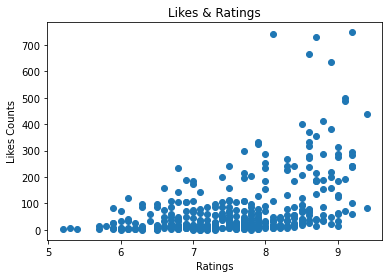

In [78]:
#plot rating, likes_count
plt.scatter(X[:,1],X[:,2])
plt.xlabel("Ratings")
plt.ylabel("Likes Counts")
plt.title("Likes & Ratings", fontdict=None, loc='center')


Text(0.5, 1.0, 'Price Tier & Ratings')

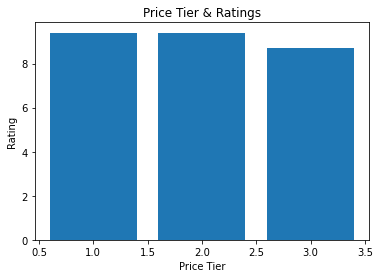

In [80]:
#plot rating, likes_count
plt.bar(X[:,0],X[:,1])
plt.xlabel("Price Tier")
plt.ylabel("Rating")
plt.title("Price Tier & Ratings", fontdict=None, loc='center')

Text(0.5, 1.0, 'Price Tier & Like Counts')

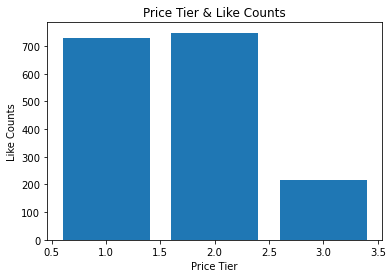

In [213]:
#plot rating, likes_count
plt. bar(X[:,0],X[:,2])
plt.xlabel("Price Tier")
plt.ylabel("Like Counts")
plt.title("Price Tier & Like Counts", fontdict=None, loc='center')


In [211]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(flat_Coffee_cluster_set)
labels = k_means.labels_

print(labels)

[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1
 1 1 1 3 1 1 1 0 2 1 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 1 0 2 0 0 0 0 1 0 0 0 0 1 1 1 3 1 2 2 1 1 1 1 0 0 2 0 0 3 3 3
 3 1 1 1 3 1 1 1 2 1 2 2 2 3 1 1 1 1 2 2 1 1 1 0 1 0 2 0 1 1 1 1 1 1 1 1 0
 1 3 1 1 1 2 1 0 1 1 1 0 1 0 1 0 1 2 1 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 1 3 1 3 1 3 1 1 1 1 3 1 1 3 1 2
 3 1 1 1 1 1 1 3 2 1 3 1 1 3 1 0 1 1 1 1 1 1 1 1 3 1 1 3 1 1 0 1 1 1 1 1 1
 1 2 1 1 2 1 1 2 2 1 1 2 1 1 0 1 1 2 1 1 2 0 2 0 0 2 0 1 0 1 1 1 1 0 1 1 0
 0 0 1 3 3 2 3 1 1 1 3 3 1 1 2 1 3 1 0 0 0 1 2 0 0 0 0 0 0 2 0 2 0 0 2 2 0
 0 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 2 0 1 2 1 3 1 2 1 2 1 2 0 1 0 1 1
 2 1 0 1 1 1 0 1 1 1 0 0 0 0]


In [214]:
Coffee_cluster_set["labels"] = labels
Coffee_cluster_set.head(5)

cs_lat     cs_lng  price_tier  rating  likes_count  labels
0  40.693544 -73.922875         3.0     8.5        119.0       2
1  40.692155 -73.926602         1.0     8.7         39.0       1
2  40.700507 -73.922795         1.0     8.8         86.0       1
3  40.700551 -73.921392         1.0     9.0         63.0       1
4  40.689544 -73.922596         1.0     8.2         42.0       1

In [215]:
k_means_labels = Coffee_cluster_set.groupby('labels').mean()

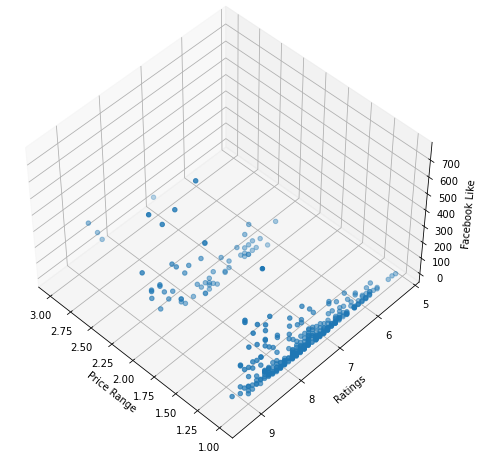

In [216]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Price Range')
ax.set_ylabel('Ratings')
ax.set_zlabel('Facebook Like')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [217]:
print(X) # Price_tier, Ratings, Like Counts

[[  3.    8.5 119. ]
 [  1.    8.7  39. ]
 [  1.    8.8  86. ]
 ...
 [  1.    7.2   5. ]
 [  1.    7.1   0. ]
 [  1.    7.3  57. ]]


Text(0, 0.5, 'ratings')

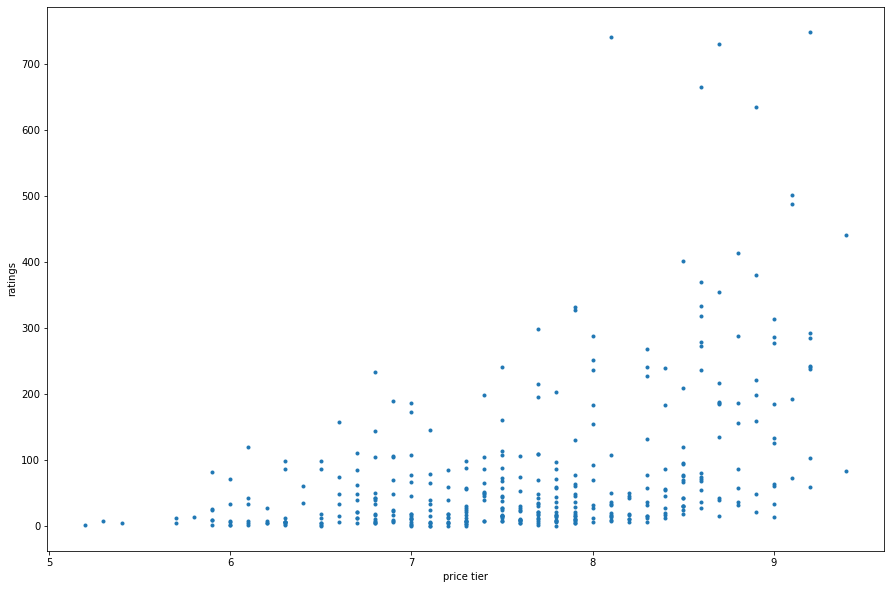

In [218]:
# plot of price tier, rqtings
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 1], X[:, 2], marker='.')
plt.xlabel("price tier")
plt.ylabel("ratings")

In [219]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [220]:
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[  1.31111111,   7.73      ,  90.04444444],
       [  1.38      ,   8.434     , 259.34      ],
       [  1.57142857,   8.81428571, 643.42857143],
       [  1.06751055,   7.34978903,  19.28270042]])

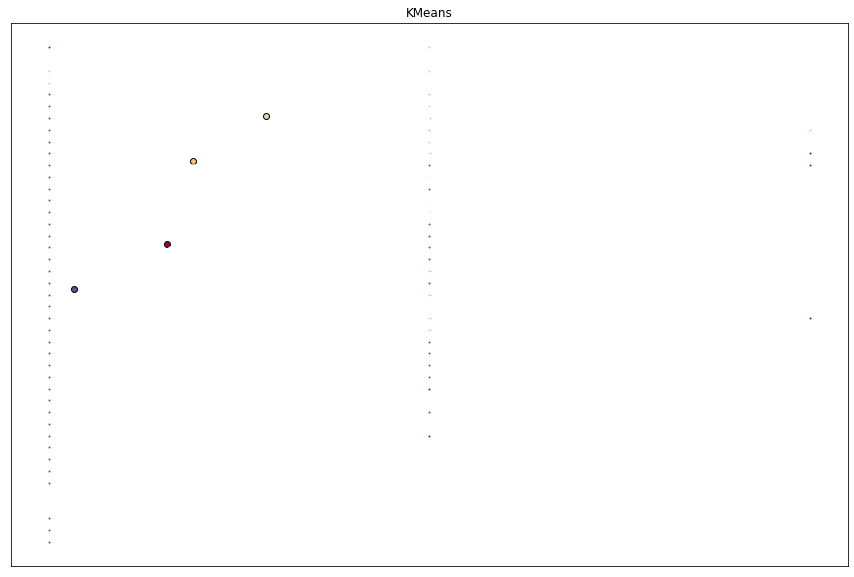

In [221]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

In [222]:
coffee_shop_list["labels"] = labels
coffee_shop_list.head()


id          coffee_shop    coffee_shop_address  \
0  53dc5f20498ec5526249f15f       Sunrise/Sunset      351 Evergreen Ave   
1  5818974a38fa5b066b4ee6ff        Hearts Coffee          1207 Broadway   
2  55e9fe71498e8edb034385a7               Dweebs        1434 Dekalb Ave   
3  594a997fd48ec17dba25d273  Knickerbocker Bagel  367 Knickerbocker Ave   
4  57b0cc38498e0f1b80d4e377      Cup of Brooklyn        1071B Gates Ave   

      cs_lat     cs_lng  price_tier  rating  likes_count  labels  
0  40.693544 -73.922875         3.0     8.5        119.0       2  
1  40.692155 -73.926602         1.0     8.7         39.0       1  
2  40.700507 -73.922795         1.0     8.8         86.0       1  
3  40.700551 -73.921392         1.0     9.0         63.0       1  
4  40.689544 -73.922596         1.0     8.2         42.0       1

In [223]:
l_unique = coffee_shop_list.labels.unique()
l_unique

array([2, 1, 3, 0], dtype=int32)

In [224]:
label_0 = coffee_shop_list[coffee_shop_list['labels'] == 0]
label_1 = coffee_shop_list[coffee_shop_list['labels'] == 1]
label_2 = coffee_shop_list[coffee_shop_list['labels'] == 2]
label_3 = coffee_shop_list[coffee_shop_list['labels'] == 3]

In [225]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium


zsh:1: command not found: conda


In [226]:
# create map and display it
map = folium.Map(location=[40, -74], zoom_start=7)

# display the map
map

In [227]:
# instantiate a feature group for the incidents in the dataframe
coffee_markers0 = folium.map.FeatureGroup()
coffee_markers1 = folium.map.FeatureGroup()
coffee_markers2 = folium.map.FeatureGroup()
coffee_markers3 = folium.map.FeatureGroup()

# label 0 
for lat, lng, in zip(label_0.cs_lat, label_0.cs_lng):
    coffee_markers0.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= 1, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=.5
        )
    )
    
# label 1 
for lat, lng, in zip(label_1.cs_lat, label_1.cs_lng):
    coffee_markers1.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= 1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=.5
        )
    )

# label 2 
for lat, lng, in zip(label_2.cs_lat, label_2.cs_lng):
    coffee_markers2.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= 1, # define how big you want the circle markers to be
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=.5
        )
    )
    
# label 3 
for lat, lng, in zip(label_3.cs_lat, label_3.cs_lng):
    coffee_markers3.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= 1, # define how big you want the circle markers to be
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=.5
        )
    )

# add incidents to map
map_w_markers = map.add_child(coffee_markers0)
map_w_markers = map.add_child(coffee_markers1)
map_w_markers = map.add_child(coffee_markers2)
map_w_markers = map.add_child(coffee_markers3)
map_w_markers

In [228]:
X0 = label_0.drop(['coffee_shop_address','id','coffee_shop','cs_lat','cs_lng','labels'], axis=1)
X1 = label_1.drop(['coffee_shop_address','id','coffee_shop','cs_lat','cs_lng','labels'], axis=1)
X2 = label_2.drop(['coffee_shop_address','id','coffee_shop','cs_lat','cs_lng','labels'], axis=1)
X3 = label_3.drop(['coffee_shop_address','id','coffee_shop','cs_lat','cs_lng','labels'], axis=1)


In [229]:
X0 = X0.values[:,:]
X0 = np.nan_to_num(X0)
X0 = StandardScaler().fit_transform(X0)

X1 = X1.values[:,:]
X1 = np.nan_to_num(X1)
X1 = StandardScaler().fit_transform(X1)

X2 = X2.values[:,:]
X2 = np.nan_to_num(X2)
X2 = StandardScaler().fit_transform(X2)

X3 = X3.values[:,:]
X3 = np.nan_to_num(X3)
X3 = StandardScaler().fit_transform(X3)




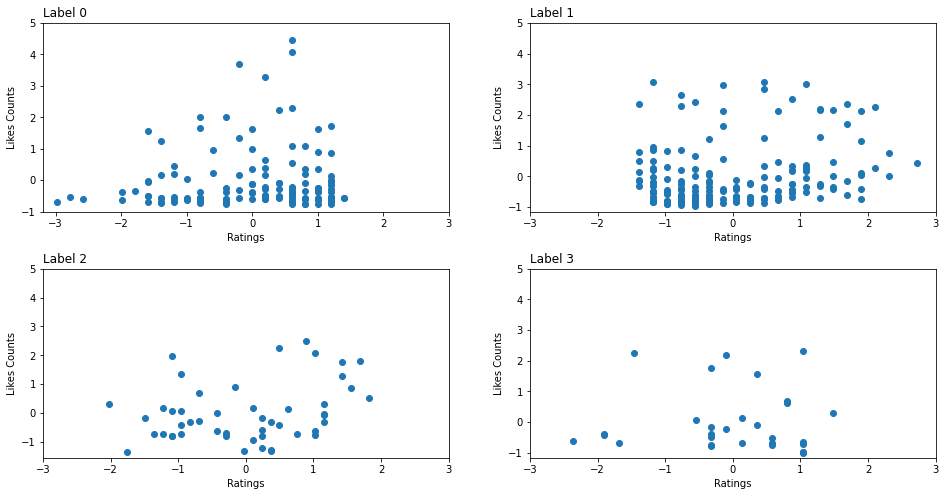

In [231]:
fig = plt.figure(figsize = (16,8))
AX0 = fig.add_subplot(2,2,1)
AX1 = fig.add_subplot(2,2,2)
AX2 = fig.add_subplot(2,2,3)
AX3 = fig.add_subplot(2,2,4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.3)


AX0.scatter(X0[:,1],X0[:,2])
AX0.set_xticks(np.arange(-3, 4, step=1))
AX0.set_yticks(np.arange(-1, 6, step=1))
AX0.set_xlabel("Ratings")
AX0.set_ylabel("Likes Counts")
AX0.set_title("Label 0", fontdict=None, loc='left')

AX1.scatter(X1[:,1],X1[:,2])
AX1.set_xticks(np.arange(-3, 4, step=1))
AX1.set_yticks(np.arange(-1, 6, step=1))
AX1.set_xlabel("Ratings")
AX1.set_ylabel("Likes Counts")
AX1.set_title("Label 1", fontdict=None, loc='left')

AX2.scatter(X2[:,1],X2[:,2])
AX2.set_xticks(np.arange(-3, 4, step=1))
AX2.set_yticks(np.arange(-1, 6, step=1))
AX2.set_xlabel("Ratings")
AX2.set_ylabel("Likes Counts")
AX2.set_title("Label 2", fontdict=None, loc='left')

AX3.scatter(X3[:,1],X3[:,2])
AX3.set_xticks(np.arange(-3, 4, step=1))
AX3.set_yticks(np.arange(-1, 6, step=1))
AX3.set_xlabel("Ratings")
AX3.set_ylabel("Likes Counts")
AX3.set_title("Label 3", fontdict=None, loc='left')

plt.show()


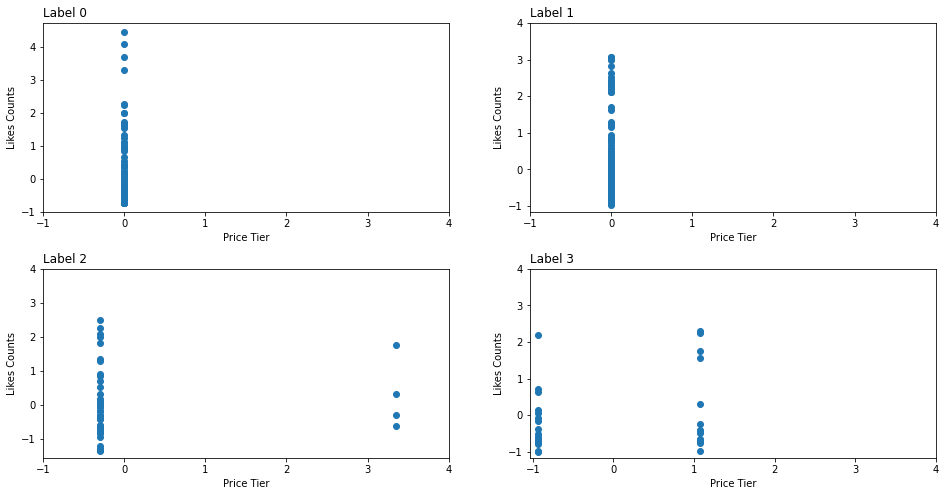

In [232]:
fig = plt.figure(figsize = (16,8))
AX0 = fig.add_subplot(2,2,1)
AX1 = fig.add_subplot(2,2,2)
AX2 = fig.add_subplot(2,2,3)
AX3 = fig.add_subplot(2,2,4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.3)


AX0.scatter(X0[:,0],X0[:,2])
AX0.set_xticks(np.arange(-1, 5, step=1))
AX0.set_yticks(np.arange(-1, 5, step=1))
AX0.set_xlabel("Price Tier")
AX0.set_ylabel("Likes Counts")
AX0.set_title("Label 0", fontdict=None, loc='left')

AX1.scatter(X1[:,0],X1[:,2])
AX1.set_xticks(np.arange(-1, 5, step=1))
AX1.set_yticks(np.arange(-1, 5, step=1))
AX1.set_xlabel("Price Tier")
AX1.set_ylabel("Likes Counts")
AX1.set_title("Label 1", fontdict=None, loc='left')

AX2.scatter(X2[:,0],X2[:,2])
AX2.set_xticks(np.arange(-1, 5, step=1))
AX2.set_yticks(np.arange(-1, 5, step=1))
AX2.set_xlabel("Price Tier")
AX2.set_ylabel("Likes Counts")
AX2.set_title("Label 2", fontdict=None, loc='left')

AX3.scatter(X3[:,0],X3[:,2])
AX3.set_xticks(np.arange(-1, 5, step=1))
AX3.set_yticks(np.arange(-1, 5, step=1))
AX3.set_xlabel("Price Tier")
AX3.set_ylabel("Likes Counts")
AX3.set_title("Label 3", fontdict=None, loc='left')

plt.show()

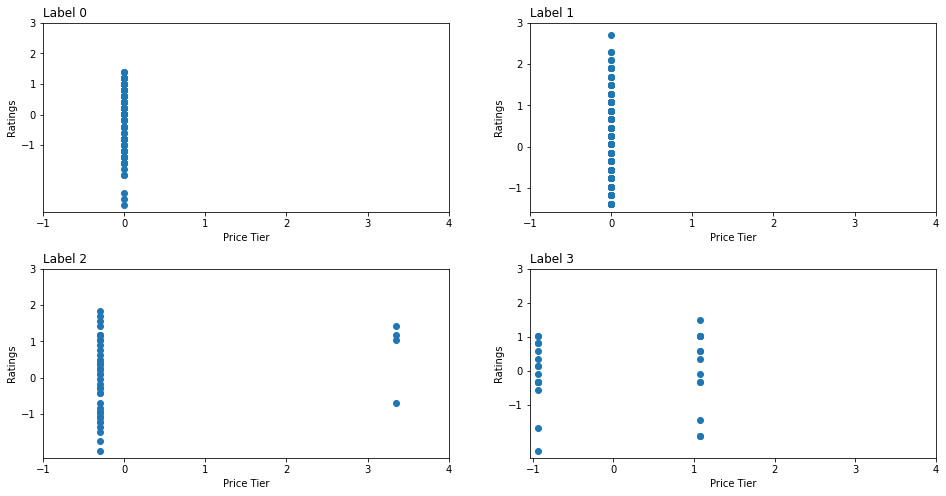

In [233]:
fig = plt.figure(figsize = (16,8))
AX0 = fig.add_subplot(2,2,1)
AX1 = fig.add_subplot(2,2,2)
AX2 = fig.add_subplot(2,2,3)
AX3 = fig.add_subplot(2,2,4)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.3)


AX0.scatter(X0[:,0],X0[:,1])
AX0.set_xticks(np.arange(-1, 5, step=1))
AX0.set_yticks(np.arange(-1, 4, step=1))
AX0.set_xlabel("Price Tier")
AX0.set_ylabel("Ratings")
AX0.set_title("Label 0", fontdict=None, loc='left')

AX1.scatter(X1[:,0],X1[:,1])
AX1.set_xticks(np.arange(-1, 5, step=1))
AX1.set_yticks(np.arange(-1, 4, step=1))
AX1.set_xlabel("Price Tier")
AX1.set_ylabel("Ratings")
AX1.set_title("Label 1", fontdict=None, loc='left')

AX2.scatter(X2[:,0],X2[:,1])
AX2.set_xticks(np.arange(-1, 5, step=1))
AX2.set_yticks(np.arange(-1, 4, step=1))
AX2.set_xlabel("Price Tier")
AX2.set_ylabel("Ratings")
AX2.set_title("Label 2", fontdict=None, loc='left')

AX3.scatter(X3[:,0],X3[:,1])
AX3.set_xticks(np.arange(-1, 5, step=1))
AX3.set_yticks(np.arange(-1, 4, step=1))
AX3.set_xlabel("Price Tier")
AX3.set_ylabel("Ratings")
AX3.set_title("Label 3", fontdict=None, loc='left')

plt.show()

In [ ]:

LAbel 0 is 


LAbel 2 is medium price, low like counts

In [234]:
 label_1

id                coffee_shop  \
1    5818974a38fa5b066b4ee6ff              Hearts Coffee   
2    55e9fe71498e8edb034385a7                     Dweebs   
3    594a997fd48ec17dba25d273        Knickerbocker Bagel   
4    57b0cc38498e0f1b80d4e377            Cup of Brooklyn   
5    55d36854498ed9c4b32f94ba           IC Brooklyn Cafe   
..                        ...                        ...   
374  4b156a46f964a52086ac23e3                  Starbucks   
375  4a9055baf964a5205c1720e3         Mapps Coffee & Tea   
377  4b994403f964a520ba6e35e3  Target HQ - Bullseye Cafe   
378  599c3a3aacb00b66896eaa99                  Starbucks   
379  561bbabd498e0094cb0e6a72              Misfit Coffee   

       coffee_shop_address     cs_lat     cs_lng  price_tier  rating  \
1            1207 Broadway  40.692155 -73.926602         1.0     8.7   
2          1434 Dekalb Ave  40.700507 -73.922795         1.0     8.8   
3    367 Knickerbocker Ave  40.700551 -73.921392         1.0     9.0   
4          1071B Gates Ave  40.689544 -73.922596         1.0     8.2   
5           251 Wilson Ave  40.698148 -73.921074         1.0     8.1   
..                     ...        ...        ...         ...     ...   
374        700 On the Mall  44.976296 -93.271550         1.0     7.7   
375  920 E Lake St Ste 157  44.949111 -93.260996         1.0     7.9   
377            33 S 6th St  44.977914 -93.272681         1.0     7.8   
378   515 South 4th Street  44.976637 -93.262685         1.0     7.6   
379     2401 Lyndale Ave S  44.958956 -93.287652         1.0     7.7   

     likes_count  labels  
1           39.0       1  
2           86.0       1  
3           63.0       1  
4           42.0       1  
5           33.0       1  
..           ...     ...  
374         43.0       1  
375         10.0       1  
377          6.0       1  
378          7.0       1  
379          5.0       1  

[176 rows x 9 columns]

LABEL 1 has the bet coffee by like counts and user ratings. The majority of coffee shops in this cluster are in New York. Newy York has the best coffee. 
